In [95]:
# import stuff
from scipy import misc
import matplotlib.pyplot as plt
from glob import glob
import numpy as np
from sklearn import (manifold, datasets, decomposition, ensemble, discriminant_analysis, random_projection)

In [118]:
# Read in gif data
filelist = glob('..\\Data\\Pendulum\\frame_*.png')
filelist.sort()
images = [misc.imread(path) for path in filelist]
images = images[2:7]
# Vectorize
vec_images = [img.reshape((1, -1)) for img in images]

# Put images into design matrix
X = np.concatenate(vec_images, axis=0);

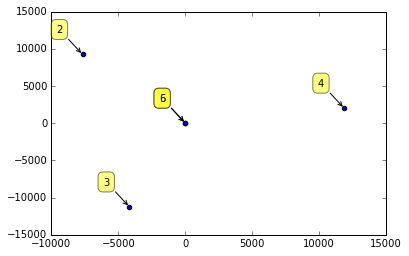

In [132]:
n_neighbors = 2
X_iso = manifold.Isomap(n_neighbors, n_components=2).fit_transform(X)
plt.scatter(X_iso[:, 0], X_iso[:, 1])
labels = range(2, 7)
for label, x, y in zip(labels, X_iso[:, 0], X_iso[:, 1]):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
#plt.imshow(images[-5], cmap=plt.cm.gray)

In [133]:
X_iso

array([[ -7.67545832e+03,   9.23935923e+03],
       [ -4.17531883e+03,  -1.12544953e+04],
       [  1.18561705e+04,   2.01795354e+03],
       [ -4.19205729e+00,  -1.98986760e+00],
       [ -1.20126771e+00,  -8.27590642e-01]])

In [77]:
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(digits.target[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(digits.data.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)